In [1]:
from matplotlib import pyplot as plt

In [2]:
import sklearn

In [3]:
from sklearn.metrics import roc_curve, auc

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.naive_bayes import GaussianNB

In [18]:
#name->(line format, classifier)

In [20]:
CLASS_MAP = {'LogisticRegression':('-', LogisticRegression()), 'Naive Bayes': ('--',GaussianNB()),'Decision Tree': ('.-', DecisionTreeClassifier(max_depth=5)), 'Random Forest': (':', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))}

In [25]:
import pandas as pd
import sklearn.datasets
def get_iris_df():
    ds=sklearn.datasets.load_iris()
    df=pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map=dict(zip(range(3), ds['target_names']))
    df['species']=[code_species_map[c]
                  for c in ds['target']]
    return df
df=get_iris_df()

X, Y = df[df.columns[:3]], (df['species']=='virginica')

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

/Users/tatsianasokalava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


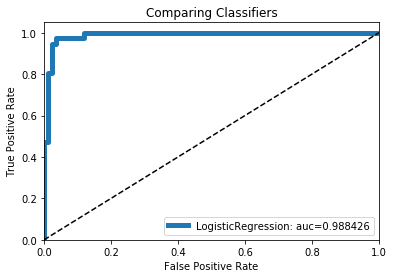

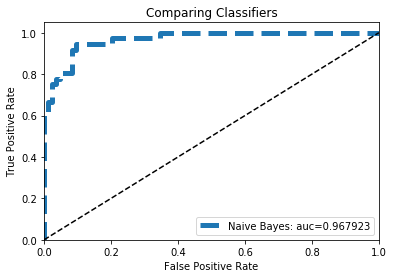

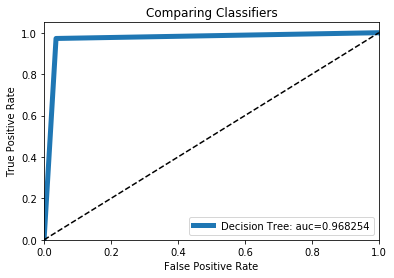

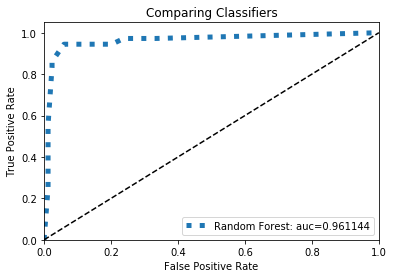

In [37]:
for name, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    preds=model.predict_proba(X_test)
    pred=pd.Series(preds[:,1])
    fpr, tpr, threshholds = roc_curve(Y_test, pred)
    auc_score=auc(fpr, tpr)
    label='%s: auc=%f' % (name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth = 5, label=label)
    plt.legend(loc="lower right")
    plt.title('Comparing Classifiers')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()